<br><br><center><h1 style="font-size:40px;color:#20B2AA">Lung Cancer Diagnosis </h1></center>
![](https://luna16.grand-challenge.org/serve/public_html/luna16_header.png/)

In [45]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import glob
import os
import cv2
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import plotly.offline as py
from sklearn.metrics import precision_recall_fscore_support
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from matplotlib import pyplot

%matplotlib inline

In [46]:
_imgs_0  = []
_labels_0= []
_imgs_1  = []
_labels_1= []
for folder in glob.glob("D:\\npy\\*"):
    for file in glob.glob(os.path.join(folder,"*.npy")):
        if folder == "D:\\npy\\0":
            _imgs_0.append(np.load(file))
            _labels_0.append(0)
        elif folder == "D:\\npy\\1":
            _imgs_1.append(np.load(file))
            _labels_1.append(1)

In [47]:
_imgs = _imgs_0+ _imgs_1
_labels = _labels_0 + _labels_1
print(len(_imgs),len(_labels))

1840 1840


In [48]:
from sklearn.utils import shuffle
_imgs, _labels = shuffle(_imgs, _labels)

In [49]:
img = np.array(_imgs)
img.shape

(1840, 32, 32)

In [50]:
labels = np.array(_labels)
labels.shape

(1840,)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(img, labels, test_size=0.1, random_state=12)
y_test_original = y_test

In [57]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Activation
from keras import backend as K

In [58]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [59]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [60]:
X_train = X_train.reshape(X_train.shape[0],  32, 32, 1)
X_test  = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [61]:
X_train.shape

(1656, 32, 32, 1)

In [27]:
def model(input_shape = (32, 32, 1)):
    # Initialising the CNN
    classifier = Sequential()
    # Step 1 - Convolution
    classifier.add(Conv2D(32, (3, 3), input_shape = input_shape, padding='same', use_bias=False))

    #Set use_bias=False in layers.conv2d() and layers.dense() because BatchNormalization
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))

    classifier.add(Conv2D(32, (3, 3), use_bias=False))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))

    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Adding a second convolutional layer
    classifier.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))

    classifier.add(Conv2D(32, (3, 3), use_bias=False))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))

    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Step 3 - Flattening
    # taking the 2-D array, i.e pooled image pixels and converting them to a one dimensional single vector.
    classifier.add(Flatten())

    # Step 4 - Full connection
    classifier.add(Dense(units = 256, kernel_initializer='he_normal', use_bias=False))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))

    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 2, activation = 'softmax', kernel_initializer='he_normal'))

    # Compiling the CNN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [28]:
classifier = model((32, 32, 1))

classifier.fit(X_train, y_train, batch_size=196,
        epochs=20, verbose=1, validation_data=(X_test, y_test))

Train on 1656 samples, validate on 184 samples
Epoch 1/20
1656/1656 [==============================] - 33s 20ms/step - loss: 0.6571 - acc: 0.6854 - val_loss: 0.6435 - val_acc: 0.7446
Epoch 2/20
1656/1656 [==============================] - 30s 18ms/step - loss: 0.4357 - acc: 0.7874 - val_loss: 0.7627 - val_acc: 0.6739
Epoch 3/20
1656/1656 [==============================] - 30s 18ms/step - loss: 0.3462 - acc: 0.8496 - val_loss: 0.5785 - val_acc: 0.7717
Epoch 4/20
1656/1656 [==============================] - 29s 18ms/step - loss: 0.2629 - acc: 0.8925 - val_loss: 0.4984 - val_acc: 0.7989
Epoch 5/20
1656/1656 [==============================] - 30s 18ms/step - loss: 0.2099 - acc: 0.9263 - val_loss: 0.5441 - val_acc: 0.7935
Epoch 6/20
1656/1656 [==============================] - 29s 18ms/step - loss: 0.1715 - acc: 0.9378 - val_loss: 0.4627 - val_acc: 0.8424
Epoch 7/20
1656/1656 [==============================] - 30s 18ms/step - loss: 0.1376 - acc: 0.9595 - val_loss: 0.4679 - val_acc: 0.8207
E

In [44]:
classifier.save("CNN_model.h5")

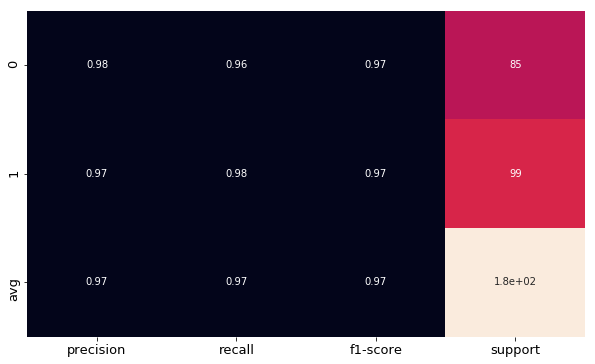

In [65]:
pr = classifier.predict_classes(X_test)
plot_classification_report(y_test_original, pr)

# Ảnh không chứa ung thư

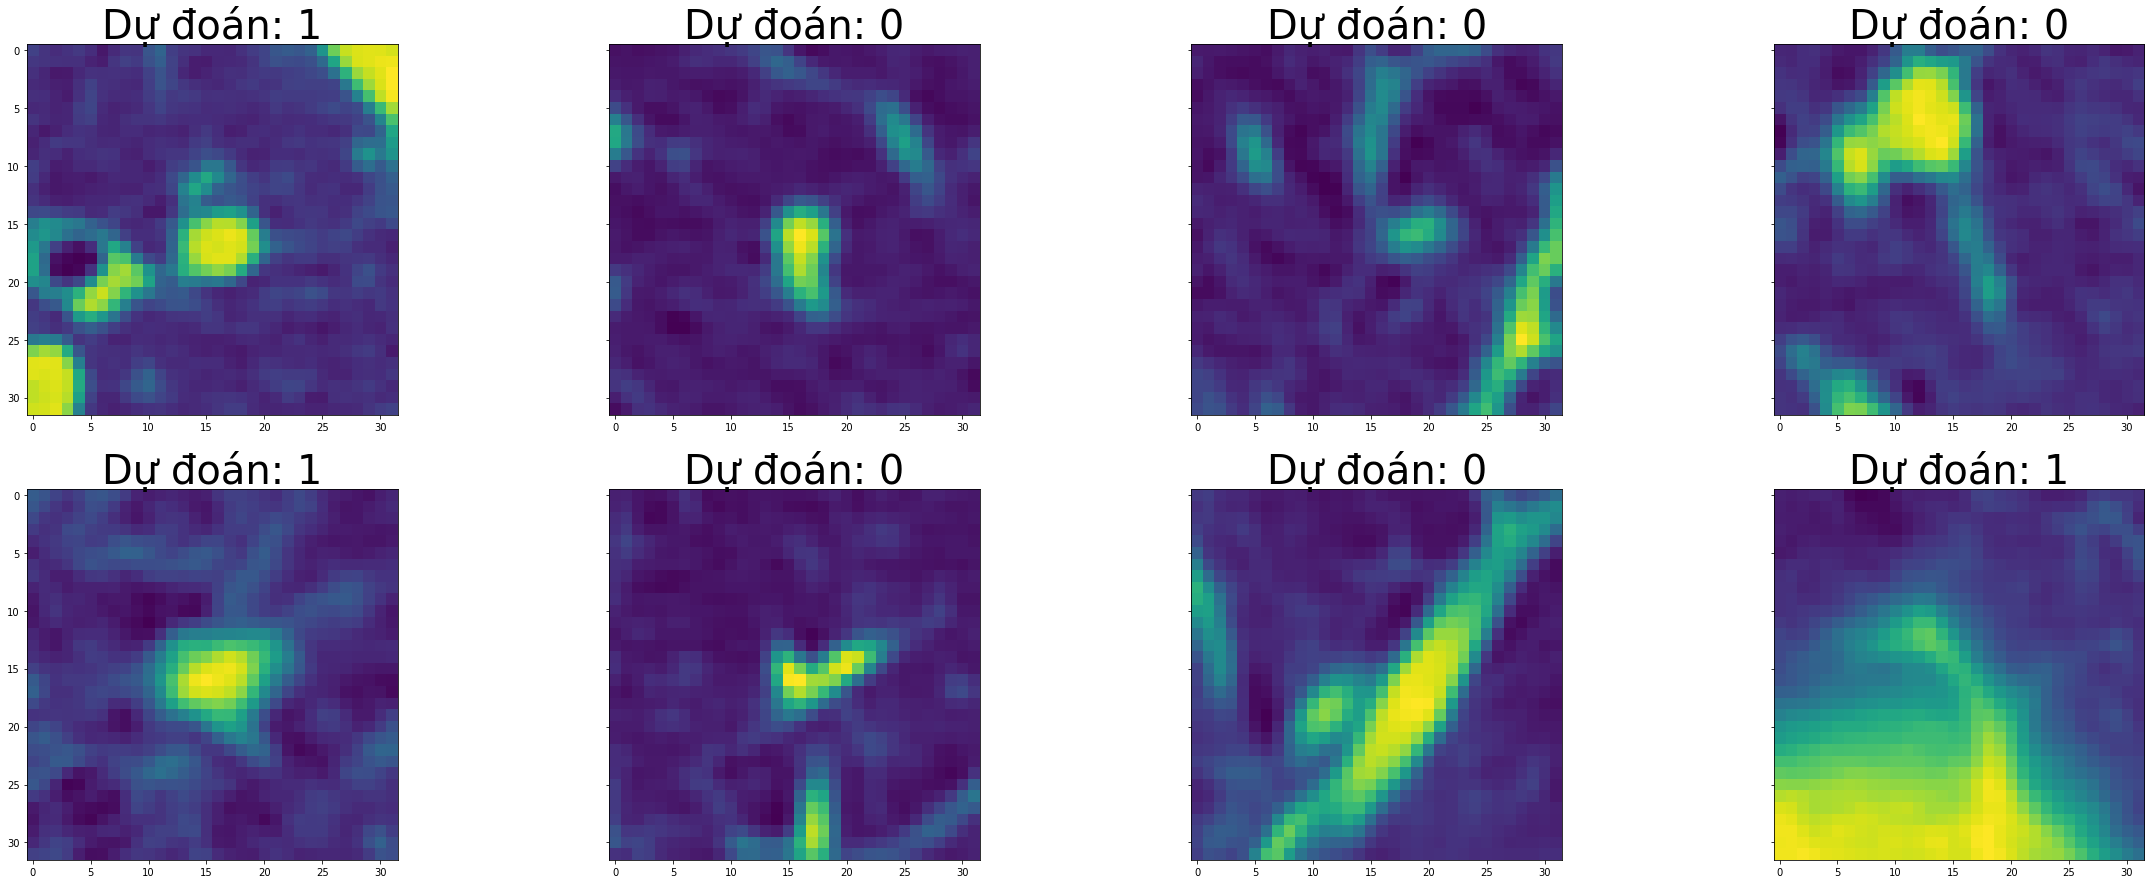

In [111]:
fig, axs = plt.subplots(2,4, figsize=(40, 15), sharey='row')
axs = axs.ravel()
_img=[]
for index,file in enumerate(glob.glob("D:\\npy\\test\\0\\*.npy")):
    _img.append(np.load(file))
    img = np.array(_img)
    img = img.astype('float32')
    img = img.reshape(img.shape[0],  32, 32, 1)
    axs[index].imshow(np.load(file))
    axs[index].set_title('Dự đoán: '+str(classifier.predict_classes(img)[index]),fontsize=40)
plt.show()

# Ảnh chứa ung thư

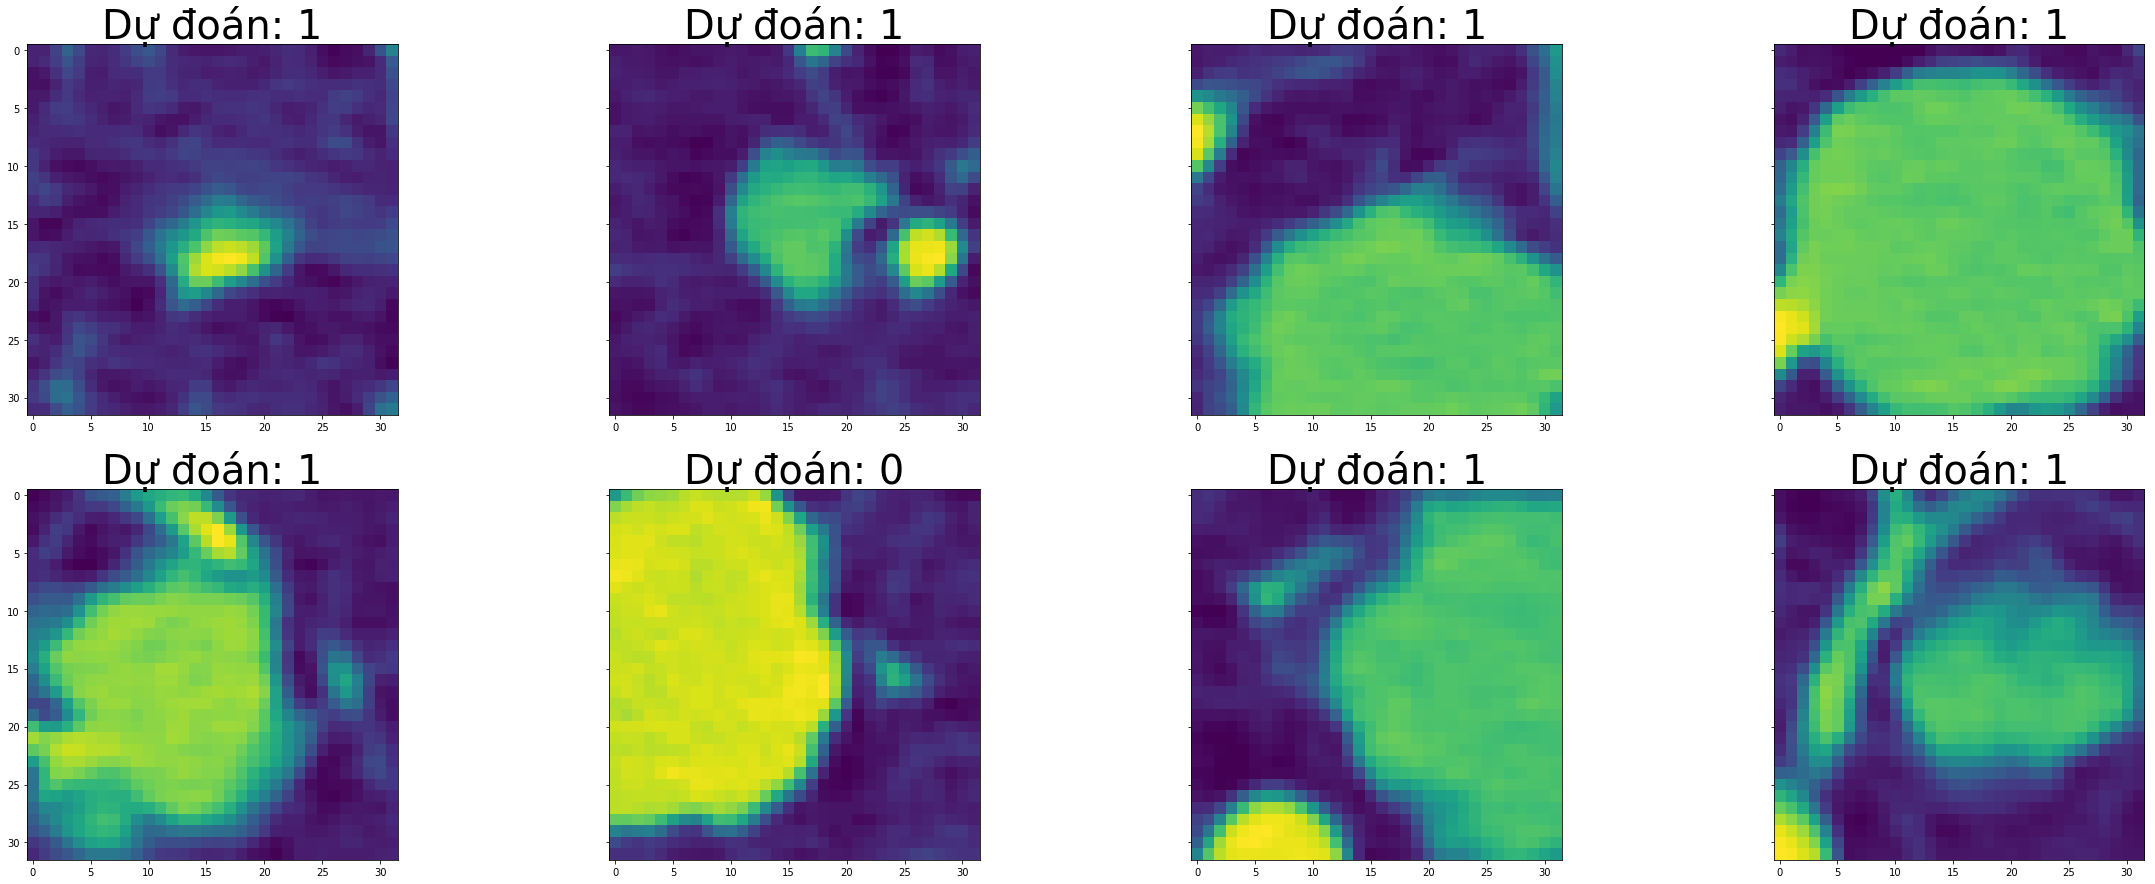

In [112]:
fig, axs = plt.subplots(2,4, figsize=(40, 15), sharey='row')
axs = axs.ravel()
_img=[]
for index,file in enumerate(glob.glob("D:\\npy\\test\\1\\*.npy")):
    _img.append(np.load(file))
    img = np.array(_img)
    img = img.astype('float32')
    img = img.reshape(img.shape[0],  32, 32, 1)
    axs[index].imshow(np.load(file))
    axs[index].set_title('Dự đoán: '+str(classifier.predict_classes(img)[index]),fontsize=40)
plt.show()

# Treatment Recommender 

In [119]:
np.load("D:\\npy\\test\\0\\1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053-27.12016248-27.1201624828.31517356-64.52887426.npy")

array([[-772, -819, -844, ...,   57,   53,   35],
       [-807, -819, -827, ...,   56,   72,   77],
       [-833, -864, -907, ...,    7,   57,  103],
       ...,
       [   0,   30,   48, ..., -798, -828, -856],
       [   0,   23,   40, ..., -828, -854, -838],
       [  24,   33,   57, ..., -818, -789, -773]], dtype=int16)

In [172]:
PathDicom = "D:\\subset6\\"
lstFilesDCM = [] 
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".mhd" in filename.lower():
            lstFilesDCM.append(str(filename).replace(".mhd",""))

In [173]:
lstFilesDCM[0]

'1.3.6.1.4.1.14519.5.2.1.6279.6001.106630482085576298661469304872'

In [174]:
df_candidates = pd.read_csv('F:\data\Luna Analysis\CSVFILES\candidates.csv')
df_candidates.head()

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


In [175]:
datasub0 = df_candidates[0:0]
datasub0

,seriesuid,coordX,coordY,coordZ,class


In [176]:
for i in range(df_candidates.shape[0]):
    if (df_candidates.seriesuid[i] in lstFilesDCM):
        datasub0 = datasub0.append(df_candidates.loc[i])

In [178]:
datasub0.shape

(52537, 5)

In [155]:
from bs4 import BeautifulSoup
import requests
import re
website_url = requests.get("https://www.cancer.org/cancer/small-cell-lung-cancer/treating/by-stage.html").text
soup = BeautifulSoup(website_url,'lxml')
all_texts = (soup.find('div',{'class':'col-md-9 col-sm-12'}))
_list=[2,3,4,5,6,7]
states_dict = {(all_texts.find_all('h3')[0].text):list(map(lambda a:all_texts.find_all('p')[a].text,_list))}
_list=[6,7,8,9,10,11,12]
states_dict[(all_texts.find_all('h3')[1].text)] = list(map(lambda a: all_texts.find_all('p')[a].text,_list))

In [157]:
states_dict.keys()

dict_keys(['Stage I cancers', 'Other limited stage cancers'])

In [169]:
((str((states_dict['Stage I cancers'])).replace("'","")).replace("]","")).replace("[","")

'If you smoke, one of the most important things you can do to be ready for treatment is to try to quit. Studies have shown that patients who stop smoking after a diagnosis of lung cancer tend to have better outcomes than those who don’t., If you only have one small tumor in your lung and there is no evidence of cancer in lymph nodes or elsewhere, your doctors may recommend surgery to remove the tumor and the nearby lymph nodes., Very few patients with SCLC are treated this way. This is only an option if you are in fairly good health and can withstand having all or part of a lung removed., Before the operation, the lymph nodes in your chest will be checked for cancer spread with mediastinoscopy or other tests, because surgery is unlikely to be a good option if the cancer has spread., Surgery is generally followed by chemotherapy. If cancer is found in the lymph nodes that were removed, radiation therapy to the chest is usually advised as well. The radiation is often given at the same ti

In [171]:
(((str((states_dict['Other limited stage cancers'])).replace("'","")).replace("]","")).replace("[","")).replace("\\n    ","")

'Surgery is generally followed by chemotherapy. If cancer is found in the lymph nodes that were removed, radiation therapy to the chest is usually advised as well. The radiation is often given at the same time as the chemo. Although this increases the side effects of treatment, it appears to be more effective than giving one treatment after the other. You might not be given radiation therapy if you already have severe lung disease (in addition to your cancer) or other serious health problems., In about half of people with SCLC, the cancer will eventually spread to the brain if no preventive measures are taken. For this reason, you may be given radiation therapy to the head (called prophylactic cranial irradiation, or PCI) to try to prevent this. The radiation is usually given in low doses. Still, some patients may have side effects from the radiation., For most people with limited stage SCLC, surgery is not an option because the tumor is too large, it’s in a place that can’t be removed